<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TSA_MonthlyCar_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet : Monthly car sales dataset

In [1]:
!pip install pandas seaborn matplotlib arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 8.8 MB/s eta 0:00:00


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Get Dataset

In [8]:
# Generate or load your dataset
url='https://drive.google.com/file/d/1Vf_bU-WlWhdYDk3YcNpBN5MhXGg5ThaA/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


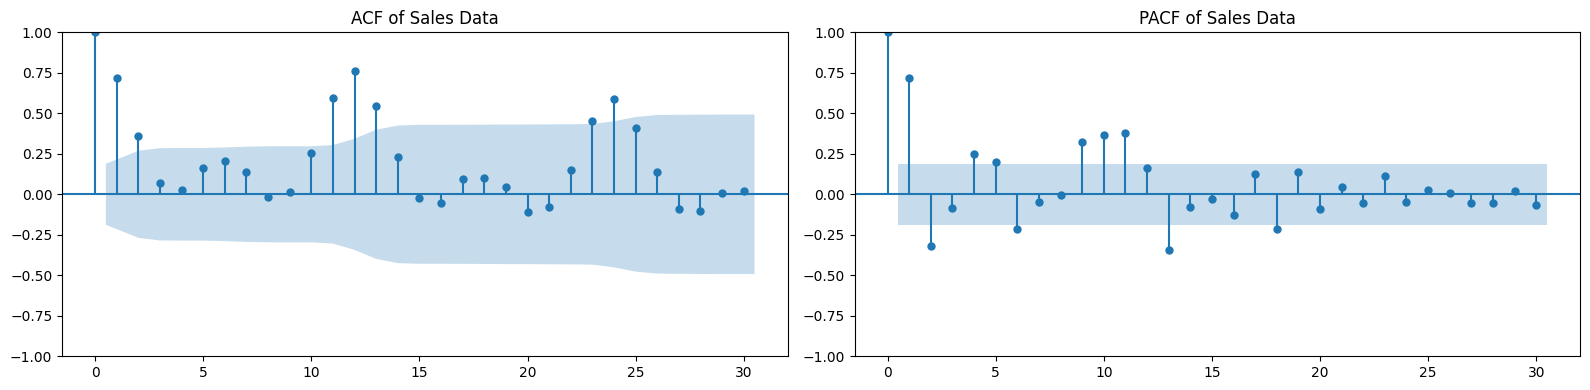

In [14]:
# prompt: PLLOT ACF AND PACF OF THIS DATA USING MATHPLOTLIB AND SEABORN

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
# DataSet : Monthly car sales dataset
# !pip install pandas seaborn matplotlib arch  #Already installed in previous code execution

# Get Dataset
# Generate or load your dataset
url='https://drive.google.com/file/d/1NqaXnCXgKhOQeLR0BI2cVeyL0GZQp_FN/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# Assuming 'Sales' is the column you want to analyze.  Replace 'Sales' if different.
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(df['Sales'], lags=30, ax=axes[0])
axes[0].set_title('ACF of Sales Data')

plot_pacf(df['Sales'], lags=30, ax=axes[1])
axes[1].set_title('PACF of Sales Data')

plt.tight_layout()
plt.show()

In [17]:
# prompt: divide the dataset into training and test in such a way that we have 80 percentage of car sales data in training dataset and the rest twenty percentage in test dataset . Do not modify the original dataset instead output the data into two csv files training.csv and test.csv

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (assuming 'df' is already loaded from the previous code)
# If not, load it again using the provided URL.

# Split the data into training and testing sets (80/20 split)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

# Save the training and testing sets to CSV files
train_data.to_csv('training.csv', index=False)
test_data.to_csv('test.csv', index=False)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   86 non-null     object
 1   Sales   86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


Plotting current data sales vs date

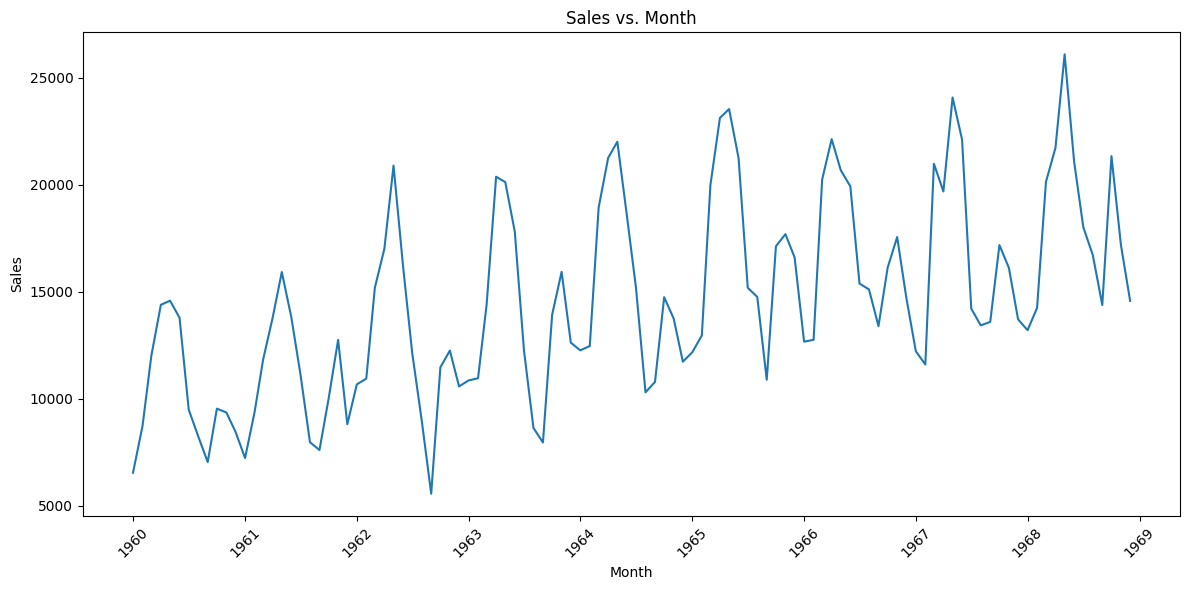

In [20]:
# prompt: PLOT THE CURRENT DATA SALES VS DATE USING SEABORN

# Assuming 'df' contains the data and a 'Date' column and 'Sales' column.
# If 'Date' column is not datetime type, convert it first:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='Month', y='Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales vs. Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Doing first order log differencing to remove trends and make the timeseries stationary

In [30]:
# prompt: Do the ADF and KPSS TEST FOR THE ABOVE TRAINing data set and report the values in this format : statistic': result[0],
#             'p_value': result[1],
#             'No_of_Lags_Used': result[2],
#             'observations_used': result[3],
#             'critical_values': result[4],
#             'is_stationary': result[1] < 0.05

import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Load the training data
train_data = pd.read_csv('training.csv')

# Assuming 'Sales' is the column you want to analyze. Replace 'Sales' if different.
# Convert 'Month' to datetime if it's not already
#train_data['Month'] = pd.to_datetime(train_data['Month'])
train_data = train_data.set_index('Month')


def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('Augmented Dickey-Fuller Test:')
    results = {
        'statistic': result[0],
        'p_value': result[1],
        'No_of_Lags_Used': result[2],
        'observations_used': result[3],
        'is_stationary': result[1] < 0.05
    }
    for key, value in results.items():
        print(f'\t{key}: {value}')
    return results

def kpss_test(timeseries):
    result = kpss(timeseries, regression='c', nlags='auto') # 'c' for constant only
    print('\nKPSS Test:')
    results = {
        'statistic': result[0],
        'p_value': result[1],
        'No_of_Lags_Used': result[2],
        'observations_used': result[3],
        'is_stationary': result[1] < 0.05
    }
    for key, value in results.items():
        print(f'\t{key}: {value}')
    return results

# Perform ADF test
adf_results = adf_test(train_data['Sales'])

# Perform KPSS test
kpss_results = kpss_test(train_data['Sales'])

Augmented Dickey-Fuller Test:
	statistic: -1.3176992608750837
	p_value: 0.6210364838663147
	No_of_Lags_Used: 12
	observations_used: 73
	is_stationary: False

KPSS Test:
	statistic: 0.9397319611640241
	p_value: 0.01
	No_of_Lags_Used: 4
	observations_used: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
	is_stationary: True


<ipython-input-30-ed44e04b52f3>:35: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries, regression='c', nlags='auto') # 'c' for constant only


Doing first order log differencing

In [32]:
# prompt: Do the first order log differencing of the sales data from the training dataset . Do a dataframe.info to show the details after this . Store the data into a file called training_log_differenced.csv

# Doing first order log differencing
train_data['Sales_log_diff'] = np.log(train_data['Sales']).diff()
train_data.dropna(inplace=True)

# Print info after differencing
train_data.info()

# Save the differenced data
train_data.to_csv('training_log_differenced.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 1960-03 to 1967-02
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales           84 non-null     int64  
 1   Sales_log       84 non-null     float64
 2   Sales_log_diff  84 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.6+ KB


Plot the log-differenced data

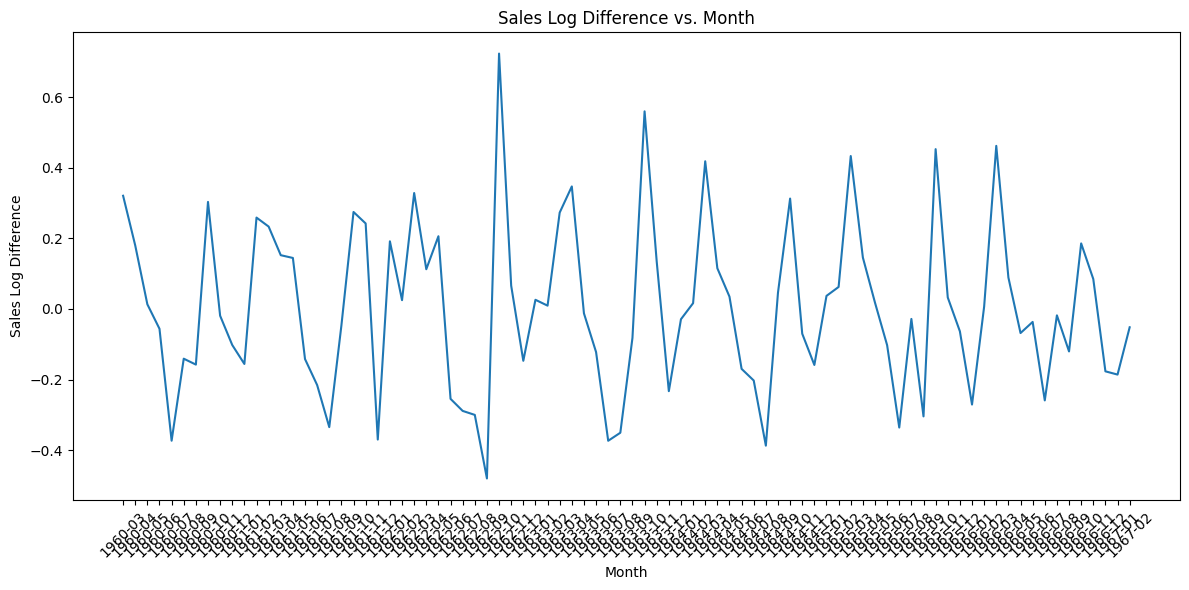

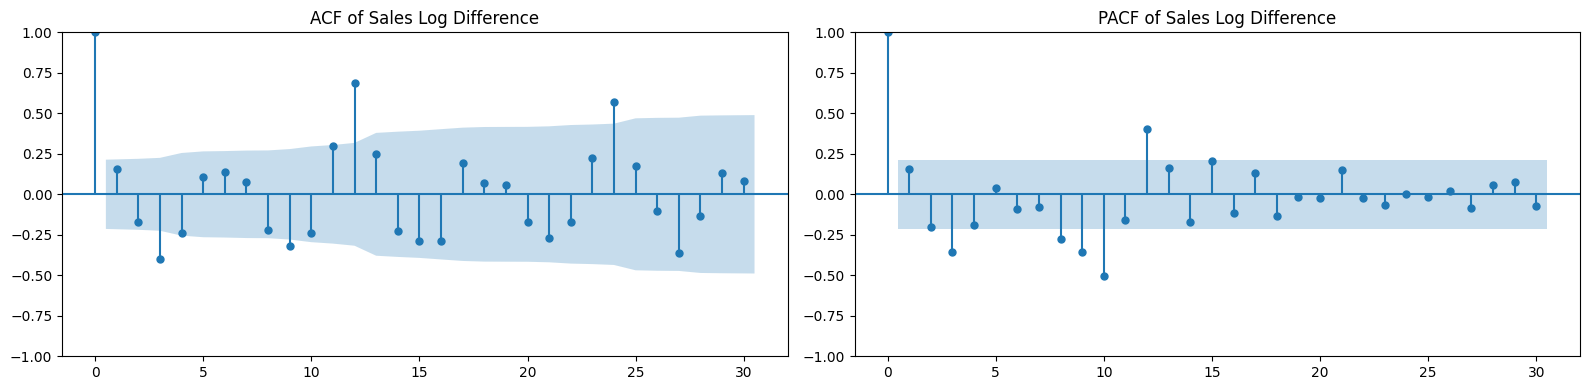

In [33]:
# prompt: Can you plot the sales_log_diff vs date . Also plot the acf and pacf values

# Plot the log-differenced data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales_log_diff'])
plt.xlabel('Month')
plt.ylabel('Sales Log Difference')
plt.title('Sales Log Difference vs. Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF and PACF of the log-differenced data
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(train_data['Sales_log_diff'], lags=30, ax=axes[0])
axes[0].set_title('ACF of Sales Log Difference')

plot_pacf(train_data['Sales_log_diff'], lags=30, ax=axes[1])
axes[1].set_title('PACF of Sales Log Difference')

plt.tight_layout()
plt.show()

Plotting the model

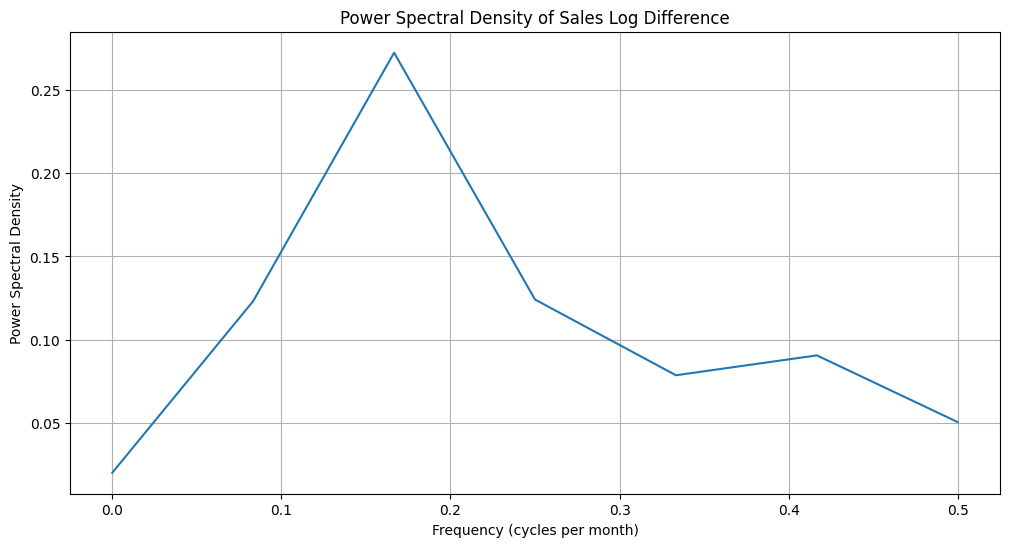

In [35]:
# prompt: Show the power spectral density of the sales_log_differenced data vs month by plotting a graph . Use welsh method with hand window

from scipy.signal import welch

# Load the differenced data
train_data = pd.read_csv('training_log_differenced.csv', index_col='Month', parse_dates=True)

# Extract the 'Sales_log_differenced' data
sales_log_differenced = train_data['Sales_log_diff']

# Calculate the power spectral density using Welch's method with a Hamming window
frequencies, power_spectrum = welch(sales_log_differenced, window='hamming', nperseg=12)

# Plotting the Power Spectral Density
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency (cycles per month)')  # Assuming monthly data
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density of Sales Log Difference')
plt.grid(True)
plt.show()

Plotting autoARIMA

In [36]:
# prompt: Generate the best model using autoARIMA and print the model summary

!pip install pmdarima

import pandas as pd
from pmdarima import auto_arima

# Load the differenced data
train_data = pd.read_csv('training_log_differenced.csv', index_col='Month', parse_dates=True)

# Extract the 'Sales_log_differenced' data
sales_log_differenced = train_data['Sales_log_diff']

# Automatically find the best ARIMA model using auto_arima
# Suppress warnings from auto_arima (optional)
import warnings
warnings.filterwarnings("ignore")

model = auto_arima(sales_log_differenced,
                   seasonal=True, m=12,  # Seasonal period is 12 (monthly data)
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)


# Print the model summary
print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.6 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-87.675, Time=2.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-46.434, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-80.264, Time=1.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-88.176, Time=1.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-48.420, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-77.368, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=-86.258, Time=0.82 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=-87.010, Time=1.17 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-86.295, Time=1.44 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=-84.759, Time=1.13 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-90.455, Time=1.15 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-76.257, Time=0.23 sec
 ARIMA(1,0,1)(1,1,1)[12] i

Forcasting for ARIMA(2,0,1)(0,1,1)[12]

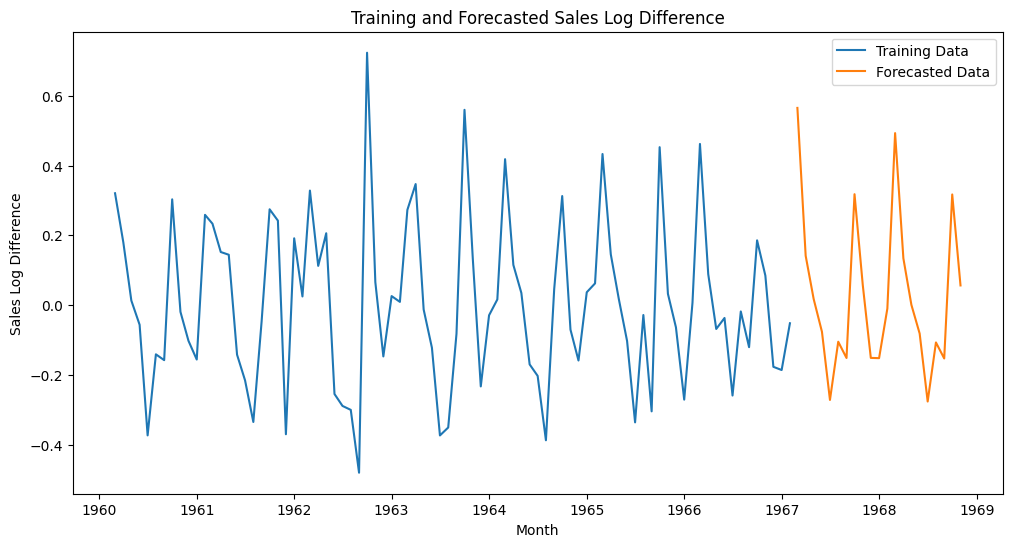

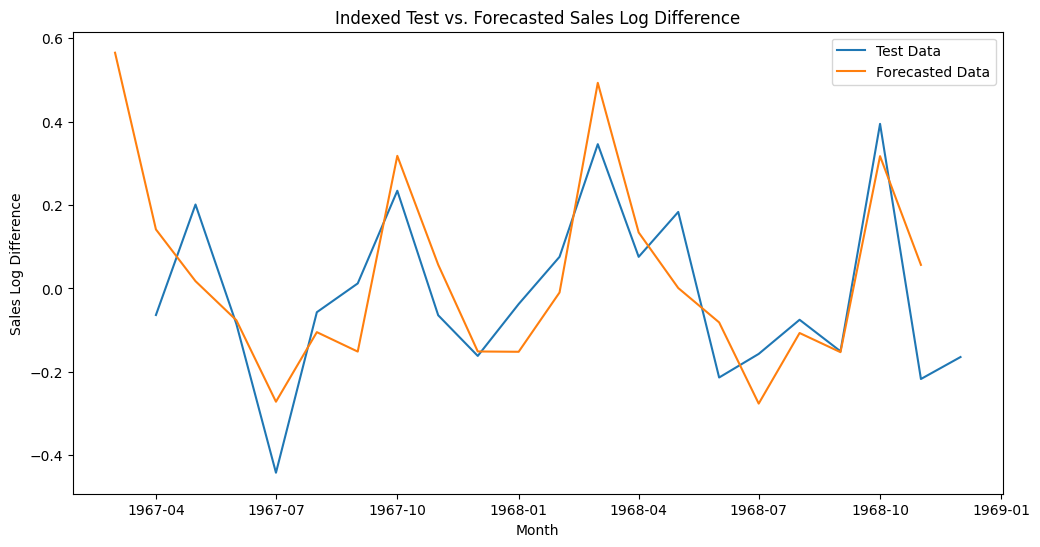

In [51]:
# prompt: can you forcast using the ARIMA(2,0,1)(0,1,1)[12] of the above data for sales and month . index the forcasted data .Plot the training and forcasted data in one plot .  plot the indexed test data vs forcasted data too in a seperate plot

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the training and test data
train_data = pd.read_csv('training_log_differenced.csv', index_col='Month', parse_dates=True)
test_data = pd.read_csv('test_log_differenced.csv', index_col='Month', parse_dates=True)

# Fit the SARIMA model (ARIMA(2,0,1)(0,1,1)[12])
model = SARIMAX(train_data['Sales_log_diff'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()

# Forecast the next 'n' steps (adjust n as per the size of the test data)
n_steps = len(test_data)
forecast = results.get_forecast(steps=n_steps)
forecasted_values = forecast.predicted_mean

# Create index for the forecasted values
forecast_index = pd.date_range(start=train_data.index[-1] + pd.DateOffset(months=1), periods=n_steps, freq='MS')
forecasted_data = pd.DataFrame({'Sales_log_diff': forecasted_values}, index=forecast_index)


# Plot the training and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales_log_diff'], label='Training Data')
plt.plot(forecasted_data['Sales_log_diff'], label='Forecasted Data')
plt.xlabel('Month')
plt.ylabel('Sales Log Difference')
plt.title('Training and Forecasted Sales Log Difference')
plt.legend()
plt.show()

# Plot the indexed test data vs. forecasted data
plt.figure(figsize=(12, 6))
plt.plot(test_data['Sales_log_diff'], label='Test Data')
plt.plot(forecasted_data['Sales_log_diff'], label='Forecasted Data')
plt.xlabel('Month')
plt.ylabel('Sales Log Difference')
plt.title('Indexed Test vs. Forecasted Sales Log Difference')
plt.legend()
plt.show()

Comparing with test data

---- Now that we have an idea of a model that potentially fits -----

plot the ARIMA(2,0,1)(0,1,1)[12] for the original data

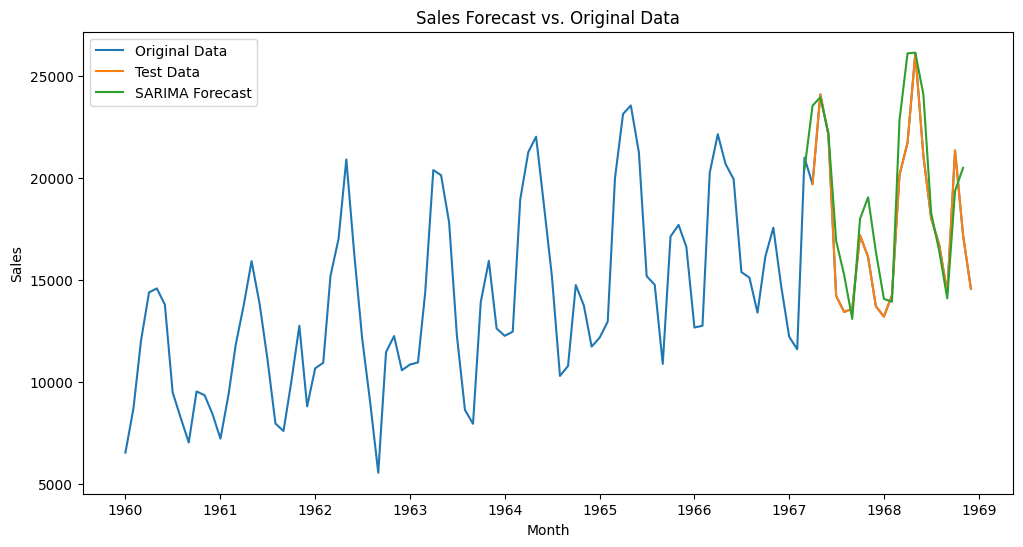

In [55]:
# prompt: can you forecast Sales vs month using the ARIMA(2,0,1)(0,1,1)[12] model from training.csv and plot it. Plot the test data from test.csv in the same plot . Plot the original data from monthly_car sales .csv in the same plot

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the original data
original_data = pd.read_csv('monthly-car-sales.csv', index_col='Month', parse_dates=True)

# Load the training and test data (assuming they are already log-differenced)
train_data = pd.read_csv('training_log_differenced.csv', index_col='Month', parse_dates=True)
test_data = pd.read_csv('test_log_differenced.csv', index_col='Month', parse_dates=True)


# Fit the SARIMA model
model = SARIMAX(train_data['Sales_log_diff'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()

# Forecast
n_steps = len(test_data)
forecast = results.get_forecast(steps=n_steps)
forecasted_values = forecast.predicted_mean
forecast_index = pd.date_range(start=train_data.index[-1] + pd.DateOffset(months=1), periods=n_steps, freq='MS')
forecasted_data = pd.DataFrame({'Sales_log_diff': forecasted_values}, index=forecast_index)


# Invert the log difference to get the actual sales forecast
# First, create a dataframe to hold the cumulative sum of the forecasted log differences
forecast_cumulative_sum = forecasted_data['Sales_log_diff'].cumsum()

# Calculate the original forecast (assuming initial value in training data)
last_train_value = train_data['Sales'].iloc[-1]
forecasted_sales = np.exp(np.log(last_train_value) + forecast_cumulative_sum)

forecasted_sales_df = pd.DataFrame({'Sales': forecasted_sales}, index=forecast_index)


# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(original_data['Sales'], label='Original Data') # plot original data
plt.plot(test_data['Sales'], label='Test Data') # Plot the test data
plt.plot(forecasted_sales_df['Sales'], label='SARIMA Forecast') # plot forcasted data
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Forecast vs. Original Data')
plt.legend()
plt.show()